# Ciclo de Krebs - Representação em Grafo

Grafo com as reações do Ciclo de Krebs, destacando os principais metabólitos orgânicos envolvidos na degradação dos produtos finais do metabolismo de carboidratos e lipídios, convertendo essas substâncias em ciclo. As setas no grafo simbolizam essas reações, com as chaves do dicionário que define o grafo representando reagentes e seus valores, seus produtos. Além disso, foi utilizada uma estrutura de grafos ponderados para sinalizar as principais enzimas que catalisam cada reação.

Ao final desse notebook, é possível obter uma  representação visual do grafo apresentado, a partir do software `graphviz`. 
_[Erros podem ocorrer nessa parte caso o software não esteja instalado na sua máquina, podendo obter a estrutura do grafo pelo site [https://dreampuf.github.io/GraphvizOnline/](https://dreampuf.github.io/GraphvizOnline/).]_

In [13]:
ciclo_de_krebs = {
    
    "acetil-CoA": {
        "citrato": {"label": "citrato-sintetase "}
    },
    
    "citrato": {
        "cis-aconitato": {"label": "aconitase"},
        "oxalacetato": {"label": "ATP-citrato liase"},
        "acetil-CoA": {"label": "ATP-citrato liase"}
    },
    
    "cis-aconitato":{
        "isocitrato": {"label": "aconitase"},
        "citrato": {"label": ""}
    },
    
    "isocitrato": {
        "oxalosuccinato": {"label":"isocitrato-desidrogenase"},
        "cis-aconitato": {"label": ""}
    },
    
    "oxalosuccinato":{
        "a-cetoglutarato": {"label": "isocitrato-desidrogenase"},
        "isocitrato": {"label": ""}
    },
    
    "a-cetoglutarato": {
        "succinil-CoA": {"label": "a-cetoglutarato-desidrogenase"},
        "oxalosuccinato": {"label": ""}
    },
    
    "succinil-CoA": {
        "succinato": {"label": "succinil-CoA-Sintetase"},
        "a-cetoglutarato": {"label": ""}
    },
    
    "succinato": {
        "fumarato": {"label": "succinato-desidrogenase"},
        "succinil-CoA": {"label": ""}
    },
    
    "fumarato": {
        "L-malato": {"label": "fumarase"},
        "succinato": {"label": ""}
    }, 
    
    "L-malato": {
        "oxalacetato": {"label": "malato-desidrogenase"},
        "fumarato": {"label": ""}
    },
   
    "oxalacetato": {
        "citrato": {"label": ""},
        "L-malato": {"label": ""}
    }
} 

Para que a representação visual seja impressa corretamente com os metaólitos e as enzimas, será necessário importar a biblioteca `networkx`, para conseguir criar e modular estruturas de grafos; a classe `AGraph` do sistema `Graphviz`, para estruturar a visualização dos grafos, e o módulo `IPython.display`, para exibir essa imagem diretamente no notebook e salvá-la em `.png`.

strict digraph "" {
	"acetil-CoA" -> citrato	[label="citrato-sintetase "];
	citrato -> "acetil-CoA"	[label="ATP-citrato liase"];
	citrato -> "cis-aconitato"	[label=aconitase];
	citrato -> oxalacetato	[label="ATP-citrato liase"];
	"cis-aconitato" -> citrato;
	"cis-aconitato" -> isocitrato	[label=aconitase];
	isocitrato -> "cis-aconitato";
	isocitrato -> oxalosuccinato	[label="isocitrato-desidrogenase"];
	oxalosuccinato -> isocitrato;
	oxalosuccinato -> "a-cetoglutarato"	[label="isocitrato-desidrogenase"];
	"a-cetoglutarato" -> oxalosuccinato;
	"a-cetoglutarato" -> "succinil-CoA"	[label="a-cetoglutarato-desidrogenase"];
	"succinil-CoA" -> "a-cetoglutarato";
	"succinil-CoA" -> succinato	[label="succinil-CoA-Sintetase"];
	succinato -> "succinil-CoA";
	succinato -> fumarato	[label="succinato-desidrogenase"];
	fumarato -> succinato;
	fumarato -> "L-malato"	[label=fumarase];
	"L-malato" -> fumarato;
	"L-malato" -> oxalacetato	[label="malato-desidrogenase"];
	oxalacetato -> citrato;
	oxalaceta

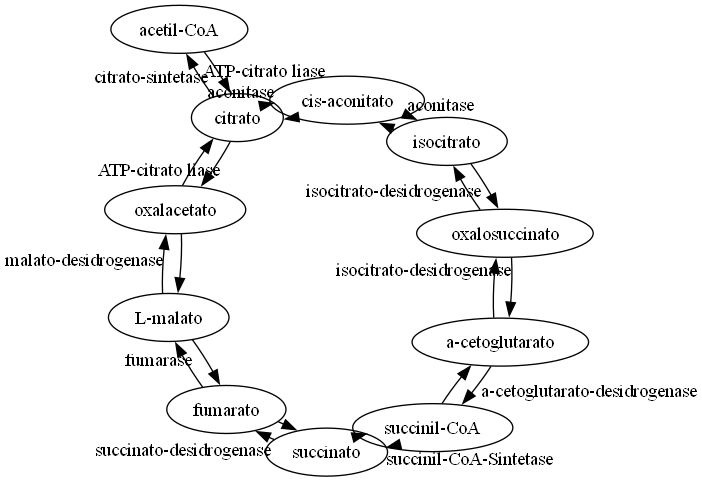

In [14]:
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph

g = nx.DiGraph(ciclo_de_krebs)
ciclo_de_krebs = to_agraph(g)

print(ciclo_de_krebs.to_string())

from IPython.display import Image, display

display(Image(ciclo_de_krebs.draw(format="png", prog="neato")))
ciclo_de_krebs.draw("ciclo_de_krebs.png", format="png", prog="neato")